In [2]:
%matplotlib inline


# Fit with Data in a pandas DataFrame

Simple example demonstrating how to read in the data using ``pandas`` and
supply the elements of the ``DataFrame`` to lmfit.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from lmfit.models import LorentzianModel
from datetime import date, timedelta

read the data into a pandas DataFrame, and use the ``x`` and ``y`` columns:



In [2]:
dframe = pd.read_csv('weather_df.csv')

In [3]:
dframe["interval_from"] = pd.to_datetime(dframe["interval_from"]).dt.date

KeyError: 'interval_from'

In [6]:
dt = date(2016, 12, 31)

In [4]:
dframe = dframe.set_index('interval_from')

In [5]:
dframe = dframe.drop(['Unnamed: 0'], axis=1)

In [9]:
dframe = dframe[dframe.index > dt]

In [6]:
grouped_df = dframe.groupby('name')

In [7]:
main_df = pd.DataFrame()
dates = pd.Series(pd.date_range(str(2017) + "-01-01", str(2022) + "-12-31", freq="D"), name='date')
days = dates.diff().astype("timedelta64[D]").fillna(1).cumsum()
df = pd.DataFrame({"year": dates.dt.year, "days": days})
df = df.set_index(dates)

for name, group in grouped_df:
    new_df = df.join(group).interpolate(method='akima', limit_direction='both')
    new_df = new_df.assign(name=name).drop(['year', 'days'], axis=1)
    main_df = pd.concat([main_df, new_df])
main_df = main_df.dropna()
main_df.to_csv('interpolated_df.csv')

C:\Users\gijst\AppData\Local\Temp\ipykernel_28484\1899128003.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


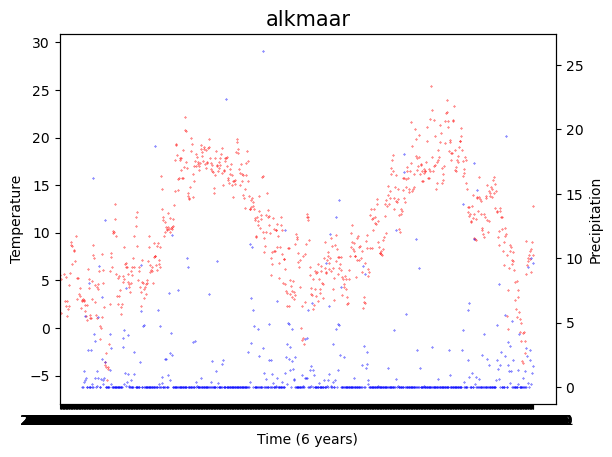

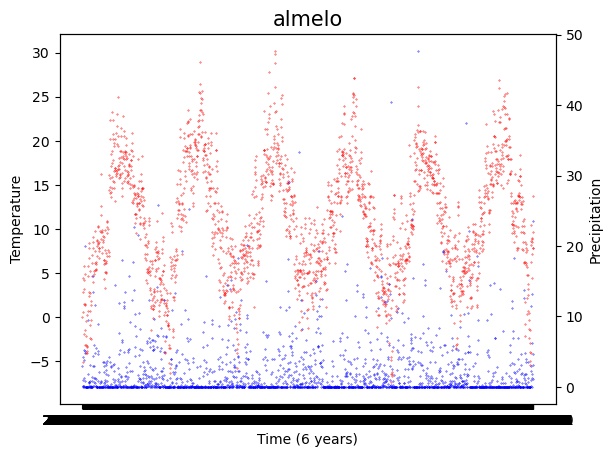

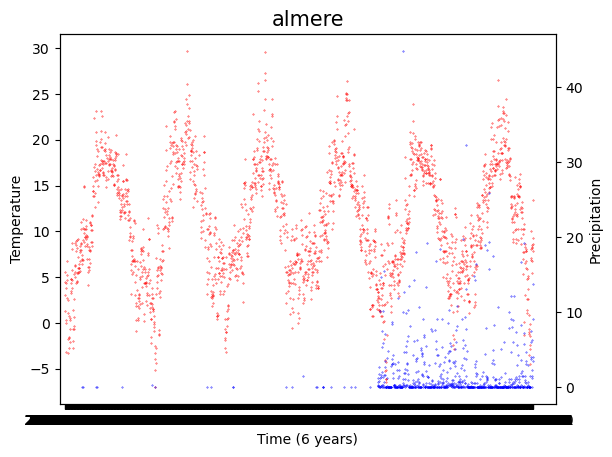

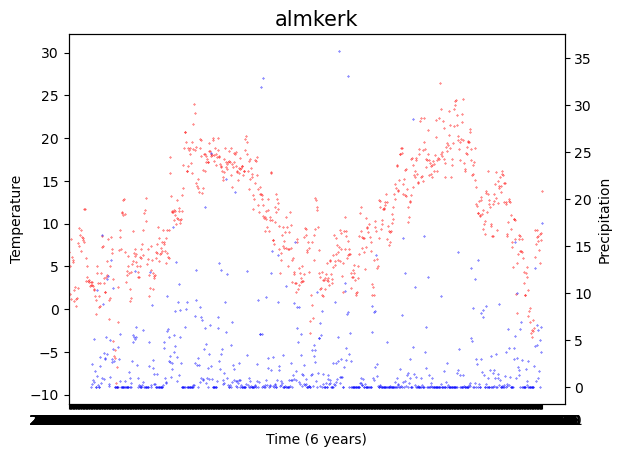

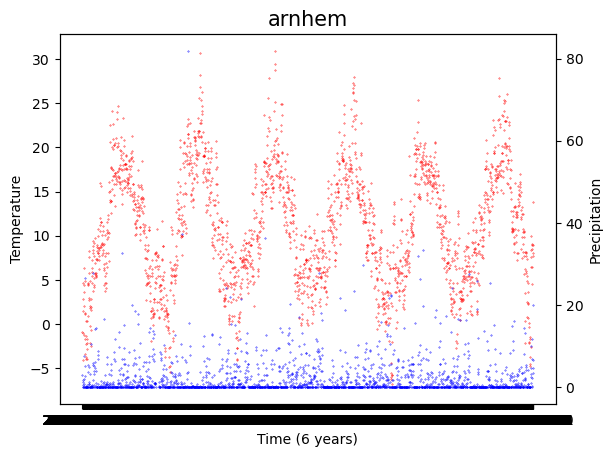

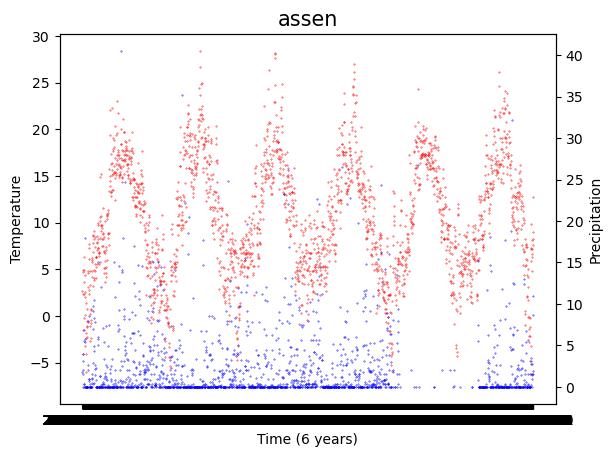

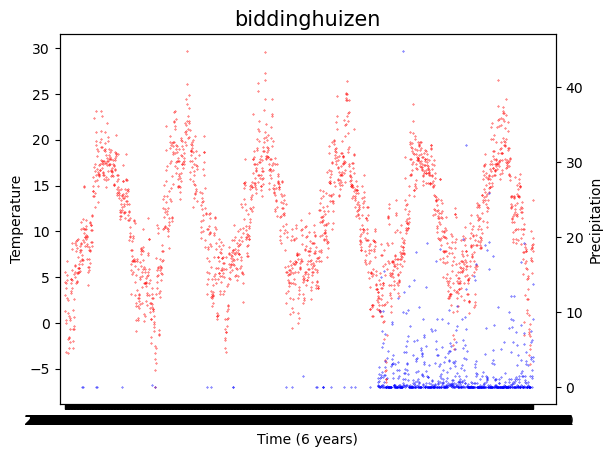

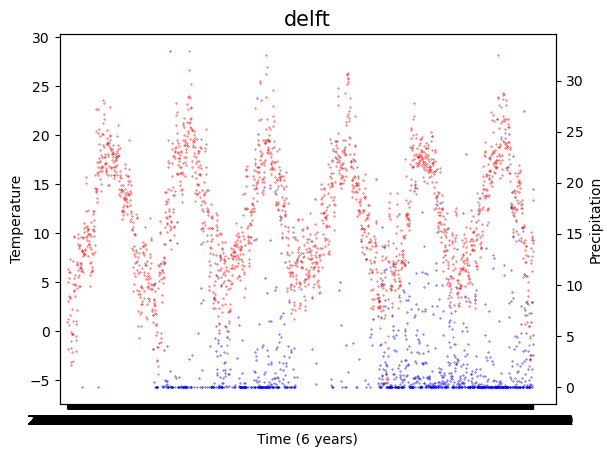

Error in callback <function flush_figures at 0x000001D393F52C10> (for post_execute):


KeyboardInterrupt: 

In [5]:
groupe_df = dframe.groupby('name')

for name, group in groupe_df:
  df = group.reset_index()
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  df.plot.scatter(ax=ax1, color='red',x="time",y="tavg", s=0.1)
  ax1.set_ylabel('Temperature')
  ax1.set_xlabel('Time (6 years)')
  ax2 = ax1.twinx()
  df.plot.scatter(ax=ax2, color='blue',x="time",y="prcp", s=0.1)
  ax2.set_ylabel('Precipitation')

  plt.title(str(name), fontsize=15)

In [55]:
year = 2019
dates = pd.Series(pd.date_range(str(year) + "-01-01", str(year) + "-12-31", freq="D"))
days = dates.diff().astype("timedelta64[D]").fillna(1).cumsum()
df = pd.DataFrame({"year": dates.dt.year, "days": days})
df = df.set_index(dates)

In [56]:
test = df.join(dframe)

In [117]:
inter = test.interpolate(method='akima', limit_direction='both')

<AxesSubplot:xlabel='index', ylabel='indices_NDVI_mean'>

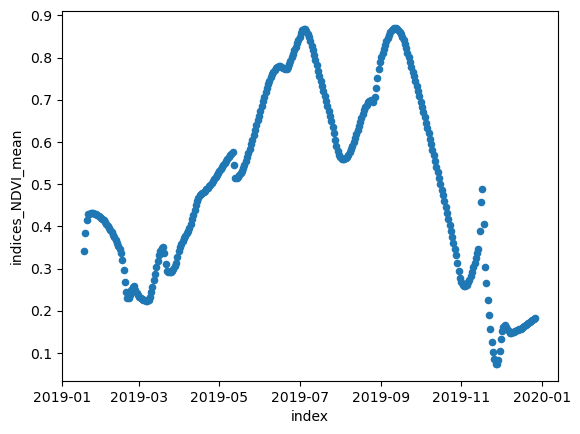

In [118]:
inter.reset_index().plot.scatter(y='indices_NDVI_mean', x='index')

<AxesSubplot:xlabel='index', ylabel='indices_NDVI_mean'>

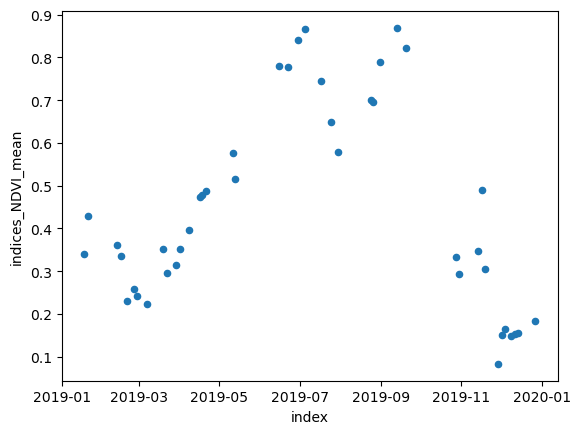

In [97]:
test.reset_index().plot.scatter(y='indices_NDVI_mean', x='index')

In [8]:

model = LorentzianModel()
params = model.guess(dframe['indices_NDVI_mean'], x=dframe.index)

result = model.fit(dframe['indices_NDVI_mean'], params, x=dframe.index)

and gives the fitting results:



and plot below:



In [9]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import numpy as np

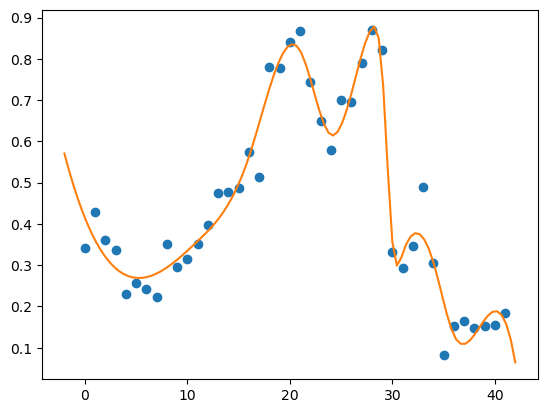

In [15]:
x = dframe.index
y = dframe["indices_NDVI_mean"]

s = UnivariateSpline(x, y, s=0.1)
xs = np.linspace(-2, len(x), 100)
ys = s(xs)

plt.plot(x, y, 'o')
plt.plot(xs, ys)
plt.show()

In [24]:
s(-1)

array(-0.22458722)